In [47]:
# Working with Google Serch Console data in Pandas.
# Adds additional features and tests correlations with and without brand terms

# To Do
# I will add GSC API to automatically populate the data.

# @ChrisReynoldsUK / QforQuery.com



In [70]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


In [49]:
### ->> Define variables
brand_sub_string = 'recruit' # Set the substring that determines if it's a brand term e.g. 'bay' for eBay
df = pd.read_csv("data/recruitem3.csv", sep=",") # The GSC export. Should be UTF-8 CSV
correlation_variable = 'Clicks' #Possible Values: Clicks, Impressions, CTR, Position, Query_Length, Number_Tokens, Brand


In [50]:
# Take a look at the GSC export
df.head(5)

,Query,Clicks,Impressions,CTR,Position
0,xray search,11482,16816,68.28%,1.36
1,recruitem,8460,9843,85.95%,1.00
2,recruitin,5743,7291,78.77%,1.11
3,x ray search,4510,7429,60.71%,1.37
4,xray linkedin,4407,12802,34.42%,1.99


In [51]:
# Convert Strings to Numbers as required
if df.CTR.dtype == ('object'):
    df['CTR'] = df['CTR'].str.replace("%", "").str.replace(",", ".").astype(float)
    df['CTR'] = pd.to_numeric(df['CTR'])

if df.Position.dtype == ('str'):
    df.Position = df.Position.str.replace(",", ".").astype(float)
    df['Position'] = pd.to_numeric(df['Position'])

df = df.round(2)

In [52]:
# Check all is well
df.head(5)

,Query,Clicks,Impressions,CTR,Position
0,xray search,11482,16816,68.28,1.36
1,recruitem,8460,9843,85.95,1.00
2,recruitin,5743,7291,78.77,1.11
3,x ray search,4510,7429,60.71,1.37
4,xray linkedin,4407,12802,34.42,1.99


In [53]:
# Add some additional features
df["Query_Length"]= df["Query"].str.len() 
df["Number_Tokens"]= df["Query"].str.count(" ") + 1 

# Define brand (variable set in 2nd cell above)
df["Brand"] = df["Query"].str.contains(brand_sub_string)
df["Brand"] = df["Brand"].astype(int)

In [54]:
# Check the new data
df.head(5)

,Query,Clicks,Impressions,CTR,Position,Query_Length,Number_Tokens,Brand
0,xray search,11482,16816,68.28,1.36,11,2,0
1,recruitem,8460,9843,85.95,1.00,9,1,1
2,recruitin,5743,7291,78.77,1.11,9,1,1
3,x ray search,4510,7429,60.71,1.37,12,3,0
4,xray linkedin,4407,12802,34.42,1.99,13,2,0


In [55]:
# Show most correlating Features 

def show_correlating_features(dataframe, correlation_variable):
    val_correlations = dataframe.corr()[correlation_variable]
    val_correlations = val_correlations.drop(labels=[correlation_variable]) #Remove the correlated-to variable to make the chart clearer
    return val_correlations
        
val_correlations_all = show_correlating_features(df, correlation_variable)


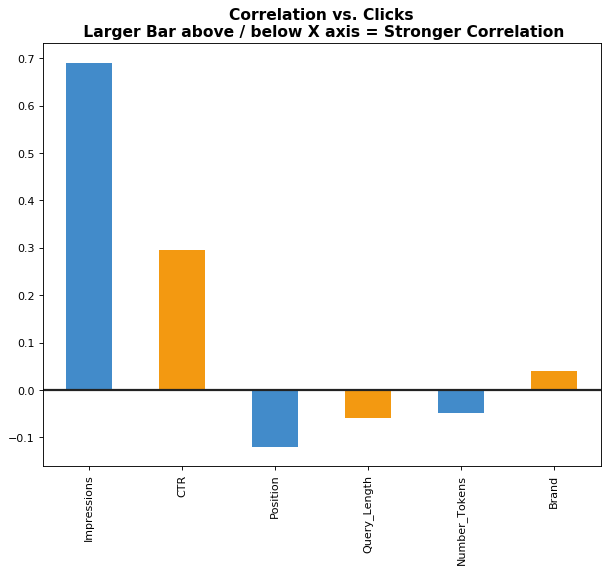

In [67]:
# Create the graph

def correlations_chart(val_correlations):
    figure(num=None, figsize=(9, 7), dpi=80, facecolor='w', edgecolor='k')
    ax = val_correlations.plot(kind='bar', color=['#428bca','#f39911']) 
    plt.title("Correlation vs. " + correlation_variable + "\n Larger Bar above / below X axis = Stronger Correlation", fontsize=14, fontweight='bold')
    ax.axhline(linewidth=2, color="#222222")        # inc. width of x-axis and color it green


correlations_chart(val_correlations_all)


In [64]:
# Now do the same, but excluding brand terms
# Only run this if you haven't selected 'Brand' as the correlation variable in Cell 3

df_no_brand = df.drop(df[df.Brand > 0].index)
df_no_brand.head(5) # All 'Brand' should by 0

,Query,Clicks,Impressions,CTR,Position,Query_Length,Number_Tokens,Brand
0,xray search,11482,16816,68.28,1.36,11,2,0
3,x ray search,4510,7429,60.71,1.37,12,3,0
4,xray linkedin,4407,12802,34.42,1.99,13,2,0
5,linkedin xray,2885,22262,12.96,2.69,13,2,0
7,x-ray search,1868,3385,55.18,1.38,12,2,0


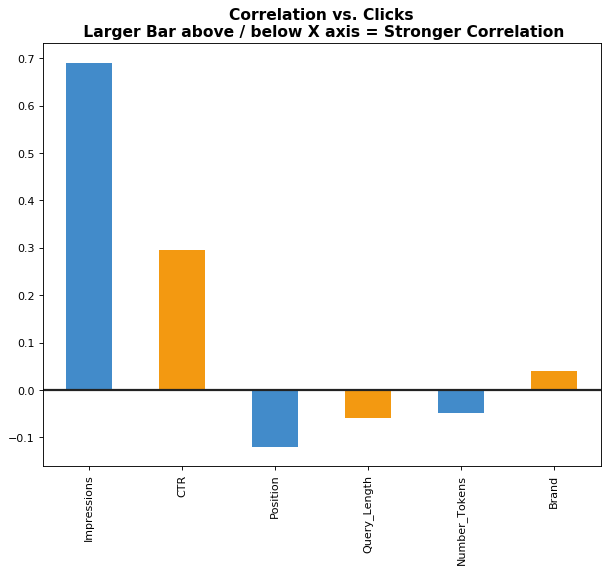

In [68]:
# Run the functions again
val_correlations_no_brand = show_correlating_features(df_no_brand, correlation_variable)
correlations_chart(val_correlations_all)

